## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
X.isna().sum().to_frame("Number of null values in data")

,Number of null values in data
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


В наборе данных нет пропущенных значений.

In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

В наборе данных нет категориальных переменных

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [43]:
from sklearn.model_selection import train_test_split

np.random.seed(1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Использование аргумента stratify при разбиении важно, потому что stratify позволяет сохранить пропорции классов ключевой переменной в тренеровочной и тестовой выборках.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler

X_train_alc_magn = X_train[['alcohol', 'magnesium']]
X_test_alc_magn = X_test[['alcohol', 'magnesium']]


scaler = StandardScaler()
scaler.fit(X_train_alc_magn)
X_train_alc_magn_scaled = scaler.transform(X_train_alc_magn)
X_test_alc_magn_scaled = scaler.transform(X_test_alc_magn)

In [46]:
def get_classifier(n):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train_alc_magn_scaled, y_train)
    return knn_classifier

In [47]:
neighbor_counts = [1, 3, 5, 10, 15, 25]
classifiers = {n:get_classifier(n) for n in neighbor_counts}

In [48]:
from sklearn.metrics import accuracy_score
def test_knn(classifier: KNeighborsClassifier, sample, y):
    y_pred = classifier.predict(sample)
    return accuracy_score(y, y_pred)

In [49]:
accuracy_df = pd.DataFrame({"Number of nearest neighbors" : neighbor_counts})
accuracy_df['Train'] = accuracy_df.apply(
    lambda row: test_knn(classifiers[row["Number of nearest neighbors"]], X_train_alc_magn_scaled, y_train), axis=1)
accuracy_df['Test'] = accuracy_df.apply(
    lambda row: test_knn(classifiers[row["Number of nearest neighbors"]], X_test_alc_magn_scaled, y_test), axis=1)
display(accuracy_df)

,Number of nearest neighbors,Train,Test
0,1,1.000000,0.648148
1,3,0.838710,0.648148
2,5,0.814516,0.666667
3,10,0.822581,0.666667
4,15,0.782258,0.648148
5,25,0.733871,0.666667


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся много подождать!

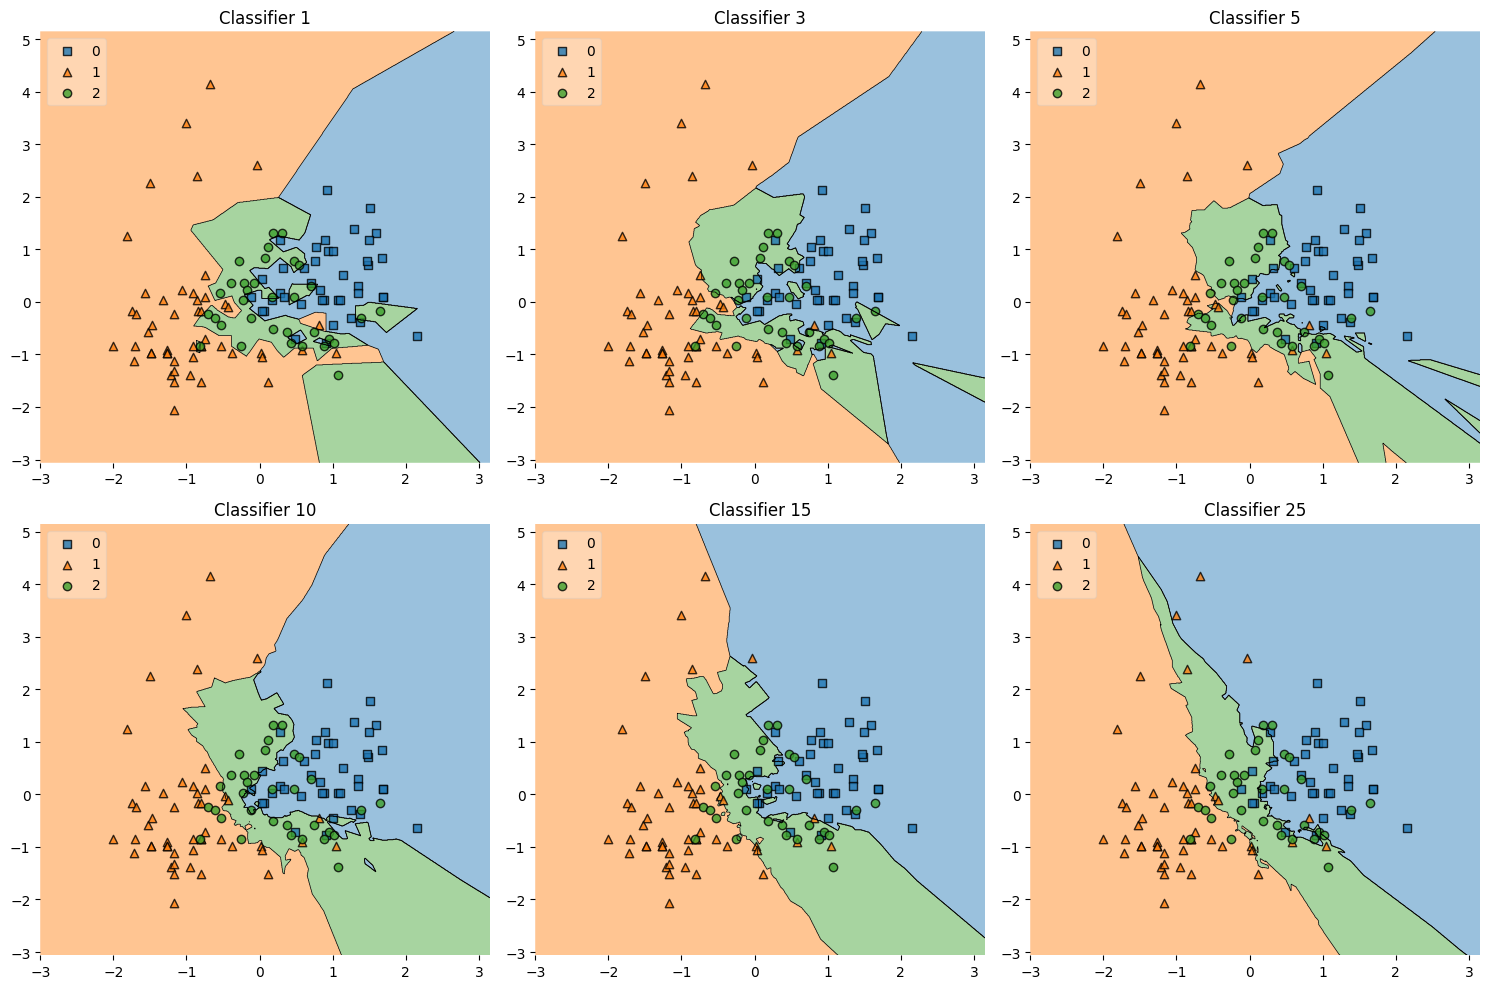

In [64]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

classifier_indices = [1, 3, 5, 10, 15, 25]

for idx, ax in zip(classifier_indices, [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(3)]):
    plot_decision_regions(X_train_alc_magn_scaled, y_train, clf=classifiers[idx], legend=2, ax=ax)
    ax.set_title(f'Classifier {idx}')

plt.tight_layout()
plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Для классификаторов, обученных на полученном разбиении выборки на train и test, оптимальными с точки зрения доли правильных ответов являются значения числа соседей равные 5, 10 и 25. Для этих значений гиперпараметра доля правильных ответов на test составила 0.66667, а доля правильных ответов на train составила  0.815, 0.823, 0.734.  
  
При рассмотрении решающих поверхностей для этих классификаторов можно заметить, что классификатор со значением гипепарамтра 5 визуально лучше всех отедляет классы.  
  
О переобучении модели может говорить значительная разница в доле правильных ответов для объектов обучающей выборки и тестовой выборки. Например для значения параметра равного 15 доля правильных ответов на train составляет 0.782, а на test только 0.65

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

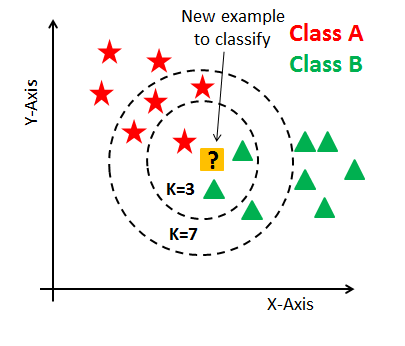

In [78]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = self._count_distance(X)
        k_indices = np.argsort(distances, axis=1)[:, :self.k]
        k_nearest_labels = self.y_train[k_indices]
        y_pred = np.array([Counter(labels).most_common(1)[0][0] for labels in k_nearest_labels])
        return y_pred

    def _count_distance(self, X):
        X = X[:, np.newaxis, :]  # Add new axis for broadcasting
        distances = np.sqrt(np.sum((X - self.X_train) ** 2, axis=2))
        return distances

In [79]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [80]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [68]:
!wget "https://github.com/LysinKirill/IDA_ML/raw/master/HW/HW4/data.zip"
!unzip "/content/data.zip"

--2024-03-26 23:49:29--  https://github.com/LysinKirill/IDA_ML/raw/master/HW/HW4/data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LysinKirill/IDA_ML/master/HW/HW4/data.zip [following]
--2024-03-26 23:49:29--  https://raw.githubusercontent.com/LysinKirill/IDA_ML/master/HW/HW4/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 750893 (733K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 733.29K  --.-KB/s    in 0.005s  

2024-03-26 23:49:29 (149 MB/s) - ‘data.zip’ saved [750893/750893]

Archive:  /content/data.zip
  inflating: diamonds.csv     

In [88]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [89]:
data.isna().sum().to_frame("Number of null values in data")

,Number of null values in data
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


В датасете нет пропущенных значений

В датасете нет столбцов, которые сразу можно называть бессмысленными. Каждый из признаков может представлять интерес для нашего исследования.

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [97]:
correlation_coefficients = data.corr(numeric_only = True)
display(correlation_coefficients)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

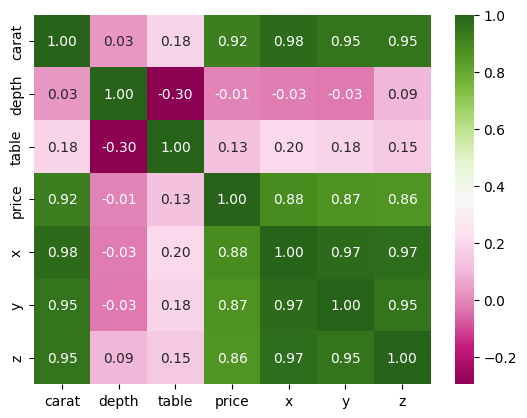

In [98]:
import seaborn as sns
sns.heatmap(correlation_coefficients, annot=True, fmt="0.2f", cmap='PiYG')

С целевой переменной (price) больше всего коррелирует признак carat(0.92), а также признаки, отвечающие за физические размеры бриллианта - признаки x, y, z - для всех этих значений наблюдается прямая сильная зависимость (> 0.85).

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [162]:
categorical = ["cut", "color", "clarity"]
data_encoded = pd.get_dummies(data, columns=categorical, drop_first=False)

In [134]:
data_encoded.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [136]:
feature_columns = data_encoded.columns.drop('price')


display(numeric_features)

X = data_encoded[feature_columns]
y = data_encoded['price']

Index(['carat', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'depth', 'table', 'x', 'y', 'z'],
      dtype='object')

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split

num_bins = 5

y_binned = pd.cut(y, bins=num_bins, labels=False)

np.random.seed(1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [143]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train);

In [167]:
def calculate_MSE(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

In [171]:
print("No regularization:")
print("\tMean Squared Error on train:", calculate_MSE(linear_reg, X_train_scaled, y_train))
print("\tMean Squared Error on test:", calculate_MSE(linear_reg, X_test_scaled, y_test))

No regularization:
	Mean Squared Error on train: 1253813.3101617037
	Mean Squared Error on test: 1330725.0216025445


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [160]:
coefficients = linear_reg.coef_
feature_names = data_encoded.columns.drop('price')

In [159]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
display(coef_df)

,Feature,Coefficient
0,carat,5380.552283
1,depth,-96.168671
2,table,-61.776942
3,x,-1156.506326
4,y,-4.299174
5,z,-37.766829
6,cut_Fair,-122.411688
7,cut_Good,-43.125154
8,cut_Ideal,51.786833
9,cut_Premium,15.011139


In [177]:
def show_significant_vars(model):
    coefficients = model.coef_
    feature_names = data_encoded.columns.drop('price')
    numeric_features = feature_names.difference(categorical)
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    max_coef = coef_df.loc[coef_df['Feature'].isin(numeric_features), 'Coefficient'].abs().max()
    significance_cutoff = max_coef / 10
    significant_vars = coef_df.loc[(coef_df['Feature'].isin(numeric_features)) & (coef_df['Coefficient'].abs() >= significance_cutoff)]
    print("\nReal variables with coefficient estimates significantly higher than others:")
    display(significant_vars)

In [179]:
show_significant_vars(linear_reg)


Real variables with coefficient estimates significantly higher than others:


,Feature,Coefficient
0,carat,5380.552283
3,x,-1156.506326


Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных: 'carat' и 'x'

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [172]:
from sklearn.linear_model import Lasso, Ridge

lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train_scaled, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled, y_train);

In [173]:
print("Lasso regularization:")
print("\tMean Squared Error on train:", calculate_MSE(lasso_reg, X_train_scaled, y_train))
print("\tMean Squared Error on test:", calculate_MSE(lasso_reg, X_test_scaled, y_test))

Lasso regularization:
	Mean Squared Error on train: 1265080.0986424615
	Mean Squared Error on test: 1337951.1086764333


In [174]:
coefficients_lasso = lasso_reg.coef_
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (lasso)': coefficients_lasso})
display(lasso_coef_df)

,Feature,Coefficient (lasso)
0,carat,4912.099719
1,depth,-62.449997
2,table,-48.424222
3,x,-702.906034
4,y,-0.000000
5,z,-48.217759
6,cut_Fair,-124.358306
7,cut_Good,-45.177239
8,cut_Ideal,41.560486
9,cut_Premium,0.000000


In [180]:
show_significant_vars(lasso_reg)


Real variables with coefficient estimates significantly higher than others:


,Feature,Coefficient
0,carat,4912.099719
3,x,-702.906034
21,clarity_SI2,-574.696507


In [181]:
print("Ridge regularization:")
print("\tMean Squared Error on train:", calculate_MSE(ridge_reg, X_train_scaled, y_train))
print("\tMean Squared Error on test:", calculate_MSE(ridge_reg, X_test_scaled, y_test))

Ridge regularization:
	Mean Squared Error on train: 1253880.3438102074
	Mean Squared Error on test: 1330388.1802977978


Для lasso-регрессии весь уменьшились,и в некоторых случаях более чем в 1.5 раза, некоторые веса обратились в ноль, что характерно для lasso-регрессии. Это говорит о том, что для некоторых признаков проблема мультиколлинеарности была ярко выражена.

In [182]:
coefficients_ridge = ridge_reg.coef_
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (lasso)': coefficients_ridge})
display(ridge_coef_df)

,Feature,Coefficient (lasso)
0,carat,5342.433766
1,depth,-93.513188
2,table,-61.464531
3,x,-1112.677612
4,y,-6.829678
5,z,-42.039509
6,cut_Fair,-122.638237
7,cut_Good,-43.242991
8,cut_Ideal,51.820819
9,cut_Premium,14.967742


In [183]:
show_significant_vars(ridge_reg)


Real variables with coefficient estimates significantly higher than others:


,Feature,Coefficient
0,carat,5342.433766
3,x,-1112.677612


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge


alphas = [0.1, 1, 10, 100, 200]


lasso_norms = []
ridge_norms = []


for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    lasso_coef_norm = np.linalg.norm(lasso_reg.coef_)
    lasso_norms.append(lasso_coef_norm)

    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    ridge_coef_norm = np.linalg.norm(ridge_reg.coef_)
    ridge_norms.append(ridge_coef_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+08, tolerance: 6.004e+07
  model = cd_fast.enet_coordinate_descent(


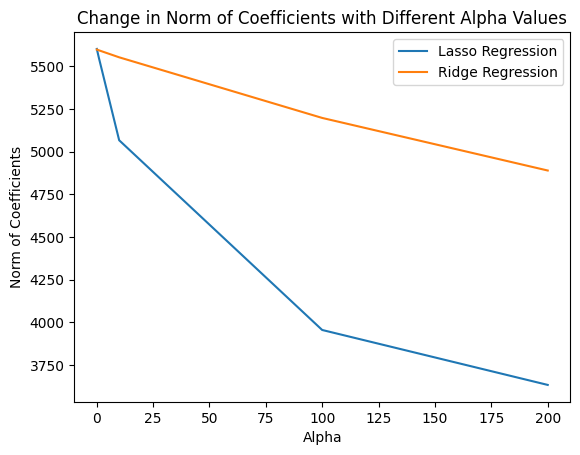

In [186]:
plt.plot(alphas, lasso_norms, label='Lasso Regression')
plt.plot(alphas, ridge_norms, label='Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Norm of Coefficients')
plt.title('Change in Norm of Coefficients with Different Alpha Values')
plt.legend()
plt.show()

По построенным графикам хорошо видно, что Lasso-регуляризация гораздо более агрессивно уменьшает веса по сравнению с Ridge-регуляризацией.  

Использование Lasso-регрессии позволяет произвести отбор наиболее значимых и информативных признаков. Веса для признаков, которые несут мало информации или сильно зависят от других будут зануляться, что хорошо выделяет такие признаки от более информативных. Во многих случаях Lasso-регрессия помогает избегать переобучения модели.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [191]:
import warnings
warnings.filterwarnings("ignore")

In [196]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

alphas = [0.1, 1, 10, 100, 200]


lasso_cv = LassoCV(alphas=alphas, cv=5);

lasso_cv.fit(X_train_scaled, y_train);
optimal_alpha = lasso_cv.alpha_
mse_values = lasso_cv.mse_path_

avg_mse_values = np.mean(mse_values, axis=1);

optimal_alpha_index = np.argmin(avg_mse_values);

In [197]:
alpha_mse_df = pd.DataFrame({'Alpha': lasso_cv.alphas_, 'Average_MSE': avg_mse_values})
display(alpha_mse_df)

,Alpha,Average_MSE
0,200.0,1.932309e+06
1,100.0,1.516276e+06
2,10.0,1.268090e+06
3,1.0,1.257152e+06
4,0.1,1.257113e+06


In [198]:
print("Optimal Alpha:", optimal_alpha)
print("Corresponding Average MSE:", avg_mse_values[optimal_alpha_index])

Optimal Alpha: 0.1
Corresponding Average MSE: 1257112.6239428793


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [200]:
final_lasso_reg = Lasso(alpha=optimal_alpha)
final_lasso_reg.fit(X_train_scaled, y_train);

In [202]:
print(f"Lasso regularization (α = {optimal_alpha}):")
print("\tMean Squared Error on train:", calculate_MSE(final_lasso_reg, X_train_scaled, y_train))
print("\tMean Squared Error on test:", calculate_MSE(final_lasso_reg, X_test_scaled, y_test))

Lasso regularization (α = 0.1):
	Mean Squared Error on train: 1253814.4112088992
	Mean Squared Error on test: 1330687.478957839


In [204]:
coefficients_final_lasso = final_lasso_reg.coef_
final_lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (lasso)': coefficients_final_lasso})
display(final_lasso_coef_df)

,Feature,Coefficient (lasso)
0,carat,5375.914572
1,depth,-95.827373
2,table,-61.636040
3,x,-1152.104257
4,y,-4.095896
5,z,-37.913105
6,cut_Fair,-128.259019
7,cut_Good,-52.936213
8,cut_Ideal,35.086159
9,cut_Premium,0.000000


Информативность признаков можно определить по абсолютному значению весов, полученных в Lasso-регуляризации.

К признакам с малой информативностью можно отнести "cut_Premium", "y", "clarity_VS2" и некоторые другие.  
Признаки с высокой информативностью включают в себя "carat", "clarity_SI2", "x"...  
  
Возможное объяснение: признак y (и z) оказался малоинформативным во многом по тому что физические габариты в некоторой степени дублируют друг друга с точностью до поворота, поэтому узнав один из этих параметров, мы уже многое можем сказать о других.  
Информативные же признаки во многом говорят сами за себя. Так, очень многое можно сказать о ценовом диапазоне драгоценного камня, зная сколько карат он весит.
























































**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [213]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error


lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_reg.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [214]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred_linear_regression = linear_reg.predict(X_test_scaled)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

In [215]:
print("Mean Squared Error of Lasso Regression:", mse_lasso)
print("Mean Squared Error of Ordinary Linear Regression:", mse_linear_regression)


if mse_lasso < mse_linear_regression:
    print("Lasso Regression is better for predictions.")
else:
    print("Linear Regression is better for predictions.")

Mean Squared Error of Lasso Regression: 1330443.5736362669
Mean Squared Error of Ordinary Linear Regression: 1330725.0216025445
Lasso Regression is better for predictions.


Для данного датасета лучше использовать Lasso-регрессию - у неё меньше MSE.  
Возможное объяснение: Lasso-регрессия показывает себя лучше на данных, в которых есть мультиколлинеарные зависимости, которые как раз присутствуют в нашем датасете.